In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("emails.csv")

In [3]:
data.shape

(5728, 2)

In [4]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
data['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

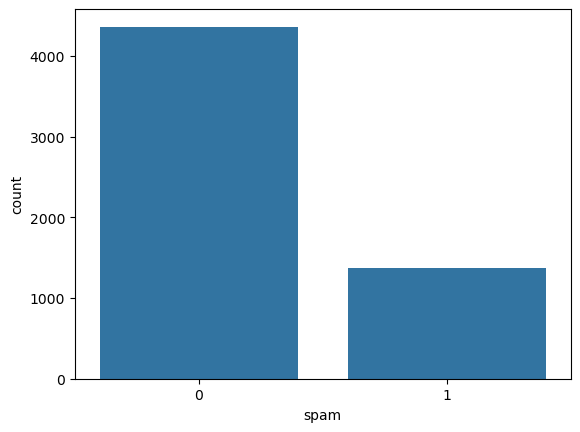

In [7]:
sns.countplot(x='spam', data=data)

In [8]:
# Check for duplicate values
data.duplicated().sum()

np.int64(33)

In [9]:
# Remove duplicate values
data.drop_duplicates(inplace = True)

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [12]:
data.shape

(5695, 2)

In [13]:
data['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

In [14]:
x = data['text'].values
y = data['spam'].values

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Preprocessin

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

In [17]:
cv = CountVectorizer()
nb = MultinomialNB()

In [18]:
pipe = make_pipeline(cv, nb)

In [19]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [20]:
y_pred = pipe.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(1139,))

In [21]:
accuracy_score(y_pred, y_test)

0.990342405618964

In [22]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
pipe.predict(email)

array([1])

In [23]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
predict = pipe.predict(email)

if predict == 0 :
    print("This is a not spam")
else:
    print("This is a spam email")

This is a spam email


In [24]:
# Save model
import pickle
pickle.dump(pipe, open("model.pkl","wb"))